In [34]:
try:
    import numpy as np
except ImportError:
    !python -m pip install numpy
try:
    import gym
    from gym import spaces
except ImportError:
    !python -m pip install gym
try:
    from stable_baselines3 import PPO
except ImportError:
    !python -m pip install stable-baselines3
try:
    import tensorflow
except ImportError:
    !python -m pip install tensorflow
    #or python -m pip install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.12.0-py3-none-any.whl
try:
    import shimmy
except ImportError:
    !python -m pip install shimmy
try:
    import gymnasium
except ImportError:
    !python -m pip install gymnasium
try:
    import sklearn
except ImportError:
    !python -m pip install scikit-learn
try:
    import pandas as pd
except ImportError:
    !python -m pip install pandas
try:
    import mplfinance
except ImportError:
    !python -m pip install mplfinance



In [35]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Lambda,Layer

from keras.models import Model
from tensorflow.keras.losses import mse
from keras import backend as K

In [36]:
file_path = '..\\Data\\df.csv'
df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1)
print(df.head(5))

       open_time  open_price  high_price  low_price  close_price   volume  \
0  1681836000000     30216.5     30244.0    30216.5      30224.8  234.468   
1  1681836300000     30224.8     30230.1    30200.1      30219.1  222.537   
2  1681836600000     30219.1     30251.2    30178.0      30216.2  562.404   
3  1681836900000     30216.2     30229.6    30200.0      30211.3  106.508   
4  1681837200000     30211.3     30217.6    30197.2      30215.6  331.226   

       turnover  
0  7.088331e+06  
1  6.724190e+06  
2  1.699579e+07  
3  3.218297e+06  
4  1.000504e+07  


In [37]:
# scaler = MinMaxScaler()

# df[['open_price', 'high_price', 'low_price', 'close_price', 'volume']] = scaler.fit_transform(df[['open_price', 'high_price', 'low_price', 'close_price', 'volume']])

# df_test = df.dropna()

In [38]:
# Split the data into training, validation, and testing sets
train_data, val_test_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)

print(test_data)

           open_time  open_price  high_price  low_price  close_price   volume  \
81410  1706259000000     40095.2     40131.9    40095.1      40103.1  204.473   
71182  1703190600000     43745.8     43799.9    43721.3      43721.5  333.356   
44102  1695066600000     26845.1     26863.6    26837.9      26848.6  497.317   
69451  1702671300000     42149.6     42225.1    42149.6      42206.0  274.972   
78508  1705388400000     42742.1     42763.4    42731.7      42742.9   43.195   
...              ...         ...         ...        ...          ...      ...   
99073  1711557900000     69244.5     69272.1    69124.2      69170.0  237.690   
67239  1702007700000     43449.4     43449.5    43412.0      43417.6  120.340   
8022   1684242600000     27040.1     27066.6    27035.0      27065.2  137.757   
91103  1709166900000     61676.7     62035.4    61676.6      62011.6  853.721   
804    1682077200000     28031.9     28037.7    28003.7      28003.8  212.960   

           turnover  
81410

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

In [40]:
df.drop('open_time', axis=1, inplace=True)

In [41]:
from sklearn.cluster import KMeans


# Perform K-means clustering with 100 clusters
kmeans = KMeans(n_clusters=200, random_state=42)
clusters = kmeans.fit_predict(df)

# Assign cluster labels to your dataframe
df['cluster'] = clusters

In [42]:
import pickle

# Save the trained model to a file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [43]:
for index, row in df.iterrows():
    print(row['cluster'])

96.0
96.0
43.0
63.0
134.0
184.0
135.0
96.0
126.0
15.0
174.0
149.0
192.0
134.0
81.0
80.0
110.0
90.0
33.0
11.0
151.0
11.0
158.0
20.0
151.0
101.0
33.0
32.0
60.0
96.0
149.0
177.0
149.0
127.0
32.0
98.0
137.0
98.0
89.0
97.0
192.0
72.0
126.0
32.0
15.0
32.0
135.0
65.0
83.0
99.0
112.0
190.0
108.0
131.0
60.0
123.0
74.0
149.0
32.0
126.0
41.0
146.0
20.0
149.0
96.0
135.0
137.0
32.0
153.0
89.0
41.0
89.0
65.0
89.0
32.0
149.0
32.0
32.0
119.0
21.0
153.0
63.0
32.0
127.0
96.0
26.0
123.0
96.0
60.0
96.0
32.0
60.0
15.0
134.0
89.0
26.0
0.0
0.0
63.0
137.0
89.0
149.0
90.0
15.0
89.0
137.0
153.0
135.0
123.0
60.0
74.0
135.0
149.0
190.0
139.0
126.0
89.0
134.0
127.0
89.0
0.0
26.0
173.0
61.0
61.0
96.0
21.0
0.0
153.0
134.0
96.0
98.0
153.0
174.0
63.0
45.0
32.0
149.0
63.0
26.0
96.0
89.0
89.0
119.0
32.0
137.0
119.0
137.0
134.0
32.0
0.0
32.0
184.0
21.0
119.0
153.0
173.0
145.0
32.0
32.0
0.0
96.0
123.0
102.0
145.0
171.0
9.0
61.0
123.0
188.0
135.0
22.0
34.0
146.0
146.0
175.0
60.0
96.0
97.0
96.0
123.0
96.0
175.0
61.0
188.0
4

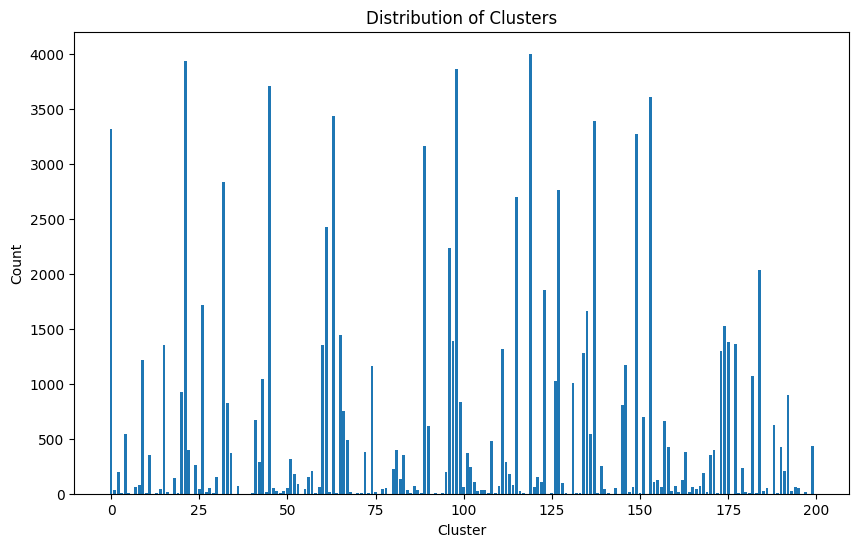

In [44]:
import matplotlib.pyplot as plt

# Count the occurrences of each cluster
cluster_counts = df['cluster'].value_counts()

# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Clusters')
plt.show()
